In [0]:
from google.colab import files
uploaded = files.upload() 
#Please select file location

#**Data** **Preprocessing**

In [0]:
#import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import random

In [389]:
df = pd.read_csv('sgemm_product.csv')
df.shape

(241600, 18)

In [0]:
#creating Runtime, target variable by taking average of Run1, Run2, Run3, Run4
df['Runtime']=df[['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)']].mean(axis=1)

In [391]:
#viewing data
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),Runtime
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81,118.6625


In [392]:
#drop other Run time variables
df1=df.drop(columns =['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'], axis = 1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241600 entries, 0 to 241599
Data columns (total 15 columns):
MWG        241600 non-null int64
NWG        241600 non-null int64
KWG        241600 non-null int64
MDIMC      241600 non-null int64
NDIMC      241600 non-null int64
MDIMA      241600 non-null int64
NDIMB      241600 non-null int64
KWI        241600 non-null int64
VWM        241600 non-null int64
VWN        241600 non-null int64
STRM       241600 non-null int64
STRN       241600 non-null int64
SA         241600 non-null int64
SB         241600 non-null int64
Runtime    241600 non-null float64
dtypes: float64(1), int64(14)
memory usage: 27.6 MB


In [393]:
#checking descriptive stats
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
MWG,241600.0,80.415364,42.469220,16.0000,32.0000,64.00,128.0000,128.0000
NWG,241600.0,80.415364,42.469220,16.0000,32.0000,64.00,128.0000,128.0000
KWG,241600.0,25.513113,7.855619,16.0000,16.0000,32.00,32.0000,32.0000
MDIMC,241600.0,13.935894,7.873662,8.0000,8.0000,8.00,16.0000,32.0000
NDIMC,241600.0,13.935894,7.873662,8.0000,8.0000,8.00,16.0000,32.0000
MDIMA,241600.0,17.371126,9.389418,8.0000,8.0000,16.00,32.0000,32.0000
NDIMB,241600.0,17.371126,9.389418,8.0000,8.0000,16.00,32.0000,32.0000
KWI,241600.0,5.000000,3.000006,2.0000,2.0000,5.00,8.0000,8.0000
VWM,241600.0,2.448609,1.953759,1.0000,1.0000,2.00,4.0000,8.0000
VWN,241600.0,2.448609,1.953759,1.0000,1.0000,2.00,4.0000,8.0000


In [394]:
#checking for NULL values
df1.isnull().sum() #no NULL values

MWG        0
NWG        0
KWG        0
MDIMC      0
NDIMC      0
MDIMA      0
NDIMB      0
KWI        0
VWM        0
VWN        0
STRM       0
STRN       0
SA         0
SB         0
Runtime    0
dtype: int64

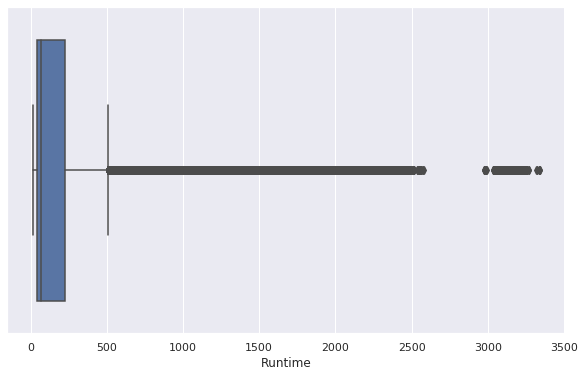

In [395]:
#checking for outliers
plt.figure(figsize=(10,6))
sns.boxplot(df1['Runtime']);

In [396]:
#removing outliers
Q1=df1['Runtime'].quantile(0.25)
Q2=df1['Runtime'].quantile(0.75)
IQR = Q2 - Q1
LL=Q1-1.5*IQR
UL=Q2+1.5*IQR
df2 = df1[(df1.Runtime>LL) & (df1.Runtime<UL)]
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
MWG,214833.0,75.688037,41.968313,16.0000,32.000,64.00,128.0000,128.0000
NWG,214833.0,75.761619,41.997377,16.0000,32.000,64.00,128.0000,128.0000
KWG,214833.0,25.592567,7.839899,16.0000,16.000,32.00,32.0000,32.0000
MDIMC,214833.0,14.475690,8.111065,8.0000,8.000,16.00,16.0000,32.0000
NDIMC,214833.0,14.470700,8.111264,8.0000,8.000,16.00,16.0000,32.0000
MDIMA,214833.0,17.390550,9.375134,8.0000,8.000,16.00,32.0000,32.0000
NDIMB,214833.0,17.388762,9.374445,8.0000,8.000,16.00,32.0000,32.0000
KWI,214833.0,5.005544,3.000002,2.0000,2.000,8.00,8.0000,8.0000
VWM,214833.0,2.339538,1.858623,1.0000,1.000,2.00,4.0000,8.0000
VWN,214833.0,2.345156,1.862122,1.0000,1.000,2.00,4.0000,8.0000


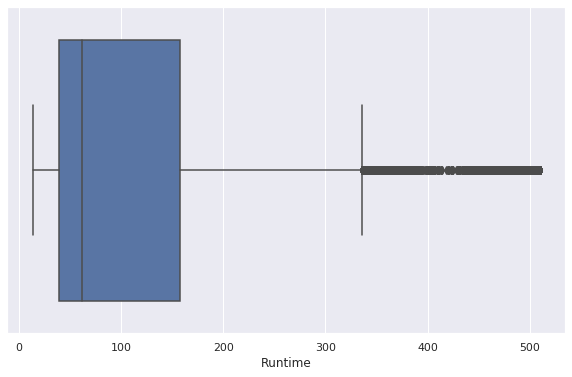

In [397]:
plt.figure(figsize=(10,6))
sns.boxplot(df2['Runtime']);

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


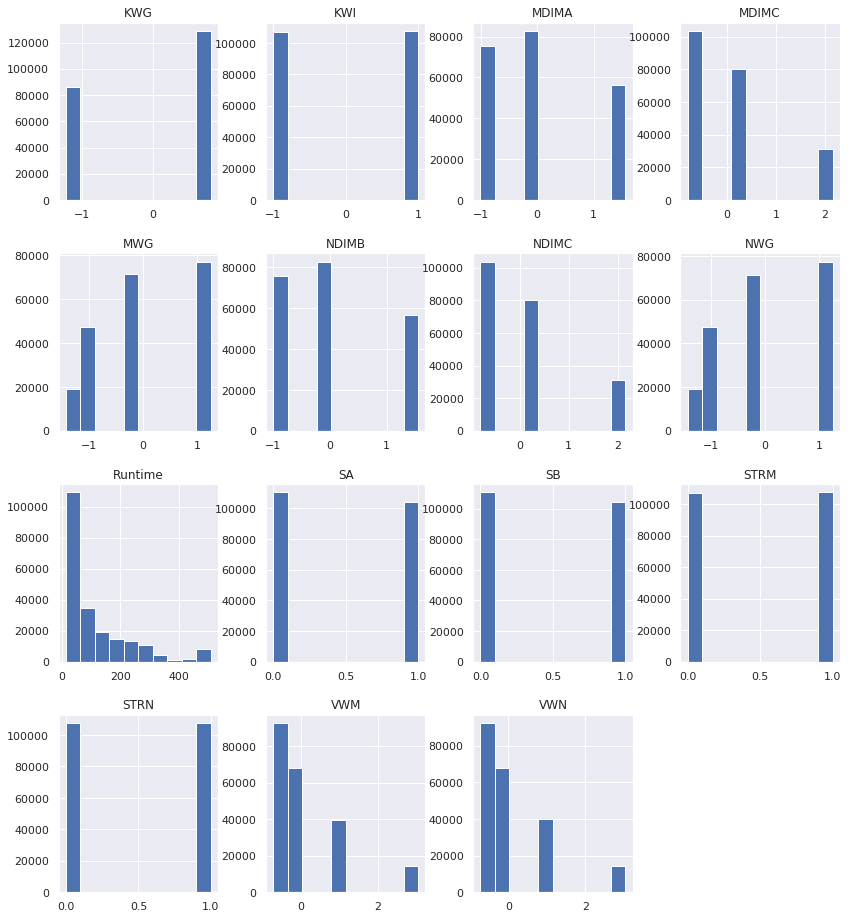

In [398]:
#checking variable distribution
for index in range(10):
   df2.iloc[:,index] = (df2.iloc[:,index]-df2.iloc[:,index].mean()) / df2.iloc[:,index].std();
df2.hist(figsize= (14,16));

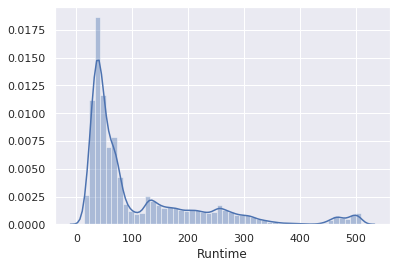

In [399]:
#plotting the distribution of Runtime
sns.distplot(df2['Runtime'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


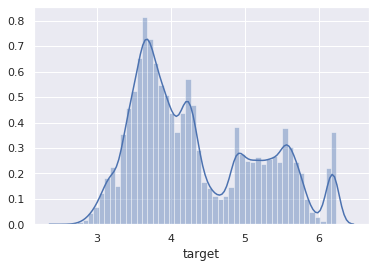

In [400]:
df2['target']=np.log(df2.Runtime)
sns.distplot(df2['target'])

Text(0.5, 1, 'Variable Correlation')

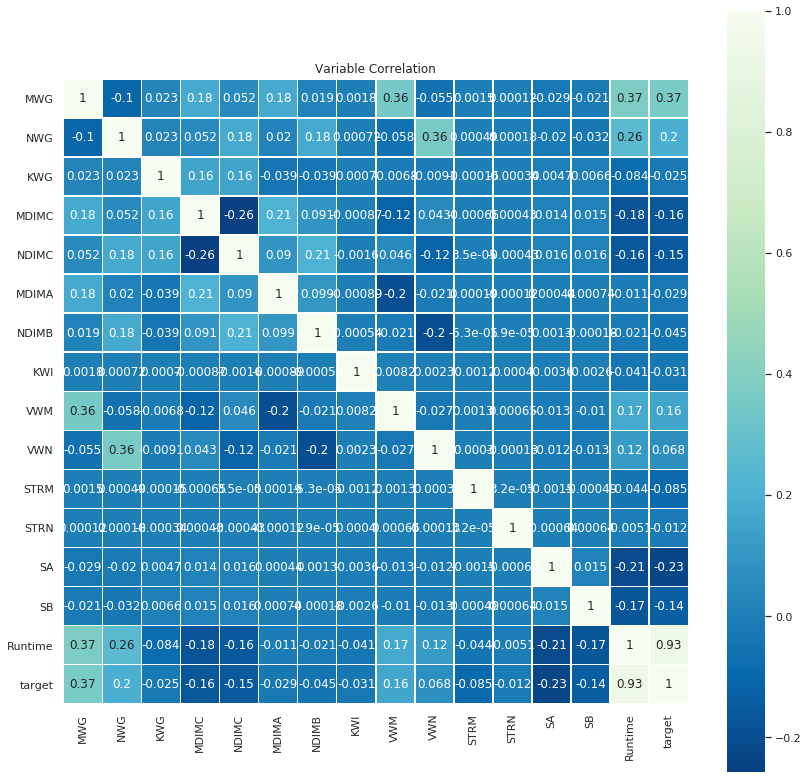

In [401]:
plt.figure(figsize=(14,14))
sns.set(font_scale=1)
sns.heatmap(df2.corr(),cmap='GnBu_r',annot=True, square = True ,linewidths=.5);
plt.title('Variable Correlation')

In [402]:
#creating an intercept varible during martix dot product
df2.insert(0,'intercept',1)
df2

,intercept,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Runtime,target
0,1,-1.422217,-1.422985,-1.223558,-0.798377,-0.797743,-1.001644,-1.001527,-1.001847,-0.720715,-0.722378,0,0,0,0,116.3700,4.756775
1,1,-1.422217,-1.422985,-1.223558,-0.798377,-0.797743,-1.001644,-1.001527,-1.001847,-0.720715,-0.722378,0,0,0,1,78.7050,4.365707
2,1,-1.422217,-1.422985,-1.223558,-0.798377,-0.797743,-1.001644,-1.001527,-1.001847,-0.720715,-0.722378,0,0,1,0,80.5650,4.389064
3,1,-1.422217,-1.422985,-1.223558,-0.798377,-0.797743,-1.001644,-1.001527,-1.001847,-0.720715,-0.722378,0,0,1,1,86.6375,4.461733
4,1,-1.422217,-1.422985,-1.223558,-0.798377,-0.797743,-1.001644,-1.001527,-1.001847,-0.720715,-0.722378,0,1,0,0,118.6625,4.776283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241595,1,1.246463,1.243849,0.817285,2.160544,2.161106,1.558319,1.558624,0.998151,0.893383,0.888687,1,0,1,1,17.8175,2.880181
241596,1,1.246463,1.243849,0.817285,2.160544,2.161106,1.558319,1.558624,0.998151,0.893383,0.888687,1,1,0,0,36.0350,3.584491
241597,1,1.246463,1.243849,0.817285,2.160544,2.161106,1.558319,1.558624,0.998151,0.893383,0.888687,1,1,0,1,35.1600,3.559909
241598,1,1.246463,1.243849,0.817285,2.160544,2.161106,1.558319,1.558624,0.998151,0.893383,0.888687,1,1,1,0,28.4525,3.348236


#**Linear Regression**

In [0]:
#define cost function
def linear_costfunc(dfile,targetvar,coefmat):
  loss=np.dot(dfile,coefmat.T)-targetvar
  cost=np.sum(np.power(loss,2)/(2*len(dfile)))
  return cost

In [0]:
#define gradient decent considering fixed iterations
def linear_gdesc(dfile,targetvar,coefmat,alpha,iterations,threshold):
  cost_ls=[linear_costfunc(dfile,targetvar,coefmat)]
  gddf=pd.DataFrame(coefmat)
  for i in range(1,iterations):
    loss=np.dot(dfile,coefmat.T)-targetvar
    dep=np.dot(loss.T,dfile)
    coefmat=coefmat-dep*alpha/len(dfile)   
    gddf=gddf.append(pd.DataFrame(coefmat),ignore_index=True)
    cost_ls+=[linear_costfunc(dfile,targetvar,coefmat)]
    if (abs(cost_ls[i]-cost_ls[i-1]))<=threshold:
      break
  gddf['cost']=cost_ls
  #print(gddf)
  print("Iterations needed to converge: ", i+1)
  min_cost=gddf[gddf.cost==min(gddf.cost)]
  print('Cost at convergance: ', cost_ls[i])
  min_cost=min_cost.drop(columns='cost',axis=1)
  #print(min_cost)
  return min_cost

In [0]:
#predicting target variable
def predict(cost_mat,xtest):
  predic_target=xtest.dot(cost_mat.T)
  return predic_target

In [0]:
#RMSE
def linear_rmse(ypredict,ytest):
  sum_sq=np.sum((ytest-ypredict)**2)
  mse=sum_sq/len(ytest)
  rmse=(mse)**(1/2)
  return rmse

In [0]:
#Linear Regression fucntion
def LinearReg(x1_train,x1_test,y1_train,y1_test,alpha,iterations,coefmat,threshold):
  if len(alpha)>1:
    coef_ls=[0]*len(alpha)
    ypredict=[0]*len(alpha)
    rmse=[0]*len(alpha)
    for i, a in enumerate(alpha, start=0):
      coef_ls[i]=linear_gdesc(x1_train,y1_train,coefmat,a,iterations,threshold)
      ypredict[i]=predict(coef_ls[i],x1_test)
      rmse[i]=linear_rmse(ypredict[i],y1_test)
      print("For learning rate=", a, " RMSE is: ", rmse[i])
      print("Coeffients: ",coef_ls[i])
    plt.plot(alpha,rmse)
    plt.xlabel('Learning Rate')
    plt.ylabel('RMSE')
    plt.show()
  elif len(threshold)>1:
    coef_ls=[0]*len(threshold)
    ypredict=[0]*len(threshold)
    rmse=[0]*len(threshold)
    for i, t in enumerate(threshold, start=0):
      coef_ls[i]=linear_gdesc(x1_train,y1_train,coefmat,alpha,iterations,t)
      ypredict[i]=predict(coef_ls[i],x1_test)
      rmse[i]=linear_rmse(ypredict[i],y1_test)
      print("For threshold=", t, " RMSE is: ", rmse[i])
      print("Coeffients: ",coef_ls[i])
    plt.plot(threshold,rmse)
    plt.xlabel('Threshold')
    plt.ylabel('RMSE')
    plt.show()
  else:
    coef_ls=[0]
    ypredict=[0]
    rmse=[0]
    for i in range(1):
      coef_ls[i]=linear_gdesc(x1_train,y1_train,coefmat,alpha,iterations,threshold)
      ypredict[i]=predict(coef_ls[i],x1_test)
      rmse[i]=linear_rmse(ypredict[i],y1_test)
      print("For threshold=", threshold," and learning rate: ",alpha, " RMSE is: ", rmse[i])
      print("Coeffients: ",coef_ls[i])
    return rmse[i]

In [0]:
#test and train data
iterations=1000
df_target=df2[['target']].values
df_features=df2.drop(columns=['target','Runtime'],axis=1).values
x1_train, x1_test, y1_train, y1_test = train_test_split(df_features, df_target, test_size = 0.2, random_state = 0)
coefmat=np.zeros((1,len(x1_train[0])),dtype=int)

#Experiment 1 - varying learning rate, fixed iterations

Iterations needed to converge:  455
Cost at convergance:  0.21197083715748666
For learning rate= 0.09  RMSE is:  0.6513333564945961
Coeffients:           0         1         2   ...        12        13        14
454  4.6645  0.412217  0.293006  ... -0.013029 -0.327371 -0.168449

[1 rows x 15 columns]
Iterations needed to converge:  433
Cost at convergance:  0.21196880075551092
For learning rate= 0.095  RMSE is:  0.6513326391774008
Coeffients:             0         1         2   ...        12        13        14
432  4.664968  0.412207  0.292996  ... -0.013242 -0.327576 -0.168653

[1 rows x 15 columns]
Iterations needed to converge:  414
Cost at convergance:  0.2119660718815923
For learning rate= 0.1  RMSE is:  0.651331768293718
Coeffients:             0         1         2   ...        12        13        14
413  4.665613  0.412194  0.292982  ... -0.013536 -0.327858 -0.168933

[1 rows x 15 columns]
Iterations needed to converge:  221
Cost at convergance:  0.2119454937855502
For learnin

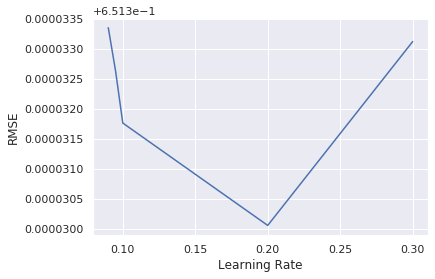

In [415]:
#Part 1 for minimum rmse with train and test data
threshold=[0.000001]
alpha=[0.09,0.095,0.1,0.2,0.3]
iterations=1000
coefmat=np.zeros((1,len(x1_train[0])),dtype=int)
LinearReg(x1_train,x1_test,y1_train,y1_test,alpha,iterations,coefmat,threshold)

Iterations needed to converge:  1000
Cost at convergance:  1.0411509514588553
For learning rate= 0.001  RMSE is:  1.4333875621561651
Coeffients:            0         1         2   ...        12       13        14
999  1.99189  0.214477  0.136649  ...  0.845978  0.74183  0.775494

[1 rows x 15 columns]
Iterations needed to converge:  1000
Cost at convergance:  0.287106379232898
For learning rate= 0.01  RMSE is:  0.7537704133945002
Coeffients:             0         1         2   ...        12        13        14
999  3.848156  0.425709  0.306781  ...  0.348788  0.042114  0.186247

[1 rows x 15 columns]
Iterations needed to converge:  414
Cost at convergance:  0.2119660718815923
For learning rate= 0.1  RMSE is:  0.651331768293718
Coeffients:             0         1         2   ...        12        13        14
413  4.665613  0.412194  0.292982  ... -0.013536 -0.327858 -0.168933

[1 rows x 15 columns]
Iterations needed to converge:  221
Cost at convergance:  0.2119454937855502
For learning

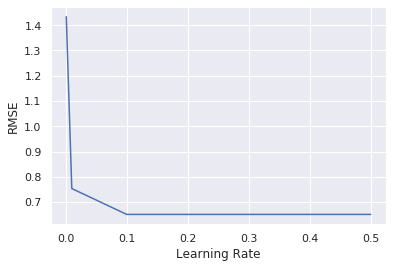

In [416]:
threshold=[0.000001]
alpha=[0.001,0.01,0.1,0.2,0.5]
iterations=1000
coefmat=np.zeros((1,len(x1_train[0])),dtype=int)
LinearReg(x1_train,x1_test,y1_train,y1_test,alpha,iterations,coefmat,threshold)

Iterations needed to converge:  70
Cost at convergance:  0.21193052425396366
For learning rate= 0.7  RMSE is:  0.6510461185722003
Coeffients:            0         1         2   ...        12       13        14
69  4.678293  0.411928  0.292714  ... -0.019324 -0.33341 -0.174456

[1 rows x 15 columns]
Iterations needed to converge:  66
Cost at convergance:  0.21192984422459923
For learning rate= 0.75  RMSE is:  0.6510450740534012
Coeffients:            0         1         2   ...        12        13       14
65  4.678782  0.411918  0.292704  ... -0.019547 -0.333624 -0.17467

[1 rows x 15 columns]
Iterations needed to converge:  62
Cost at convergance:  0.21192963318532992
For learning rate= 0.8  RMSE is:  0.6510447498986992
Coeffients:            0         1       2         3   ...       11       12        13        14
61  4.678942  0.411915  0.2927  0.053093  ... -0.14618 -0.01962 -0.333694 -0.174739

[1 rows x 15 columns]
Iterations needed to converge:  58
Cost at convergance:  0.211929

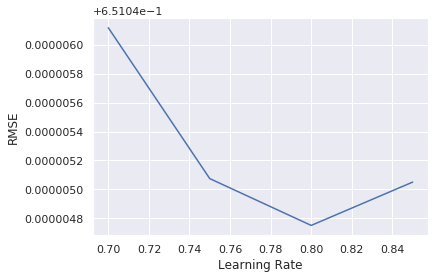

In [418]:
#Part 2 for minimum rmse within training data
threshold=[0.000001]
alpha=[0.7,0.75,0.8,0.85]
iterations=1000
coefmat=np.zeros((1,len(x1_train[0])),dtype=int)
LinearReg(x1_train,x1_train,y1_train,y1_train,alpha,iterations,coefmat,threshold)

Iterations needed to converge:  1000
Cost at convergance:  1.0411509514588553
For learning rate= 0.001  RMSE is:  1.4430183307628879
Coeffients:            0         1         2   ...        12       13        14
999  1.99189  0.214477  0.136649  ...  0.845978  0.74183  0.775494

[1 rows x 15 columns]
Iterations needed to converge:  1000
Cost at convergance:  0.287106379232898
For learning rate= 0.01  RMSE is:  0.7577682749137734
Coeffients:             0         1         2   ...        12        13        14
999  3.848156  0.425709  0.306781  ...  0.348788  0.042114  0.186247

[1 rows x 15 columns]
Iterations needed to converge:  414
Cost at convergance:  0.2119660718815923
For learning rate= 0.1  RMSE is:  0.651100717065482
Coeffients:             0         1         2   ...        12        13        14
413  4.665613  0.412194  0.292982  ... -0.013536 -0.327858 -0.168933

[1 rows x 15 columns]
Iterations needed to converge:  62
Cost at convergance:  0.21192963318532992
For learning

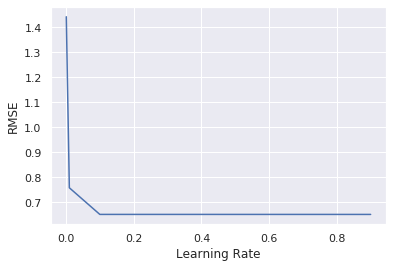

In [420]:
threshold=[0.000001]
alpha=[0.001,0.01,0.1,0.8,0.9]
iterations=1000
coefmat=np.zeros((1,len(x1_train[0])),dtype=int)
LinearReg(x1_train,x1_train,y1_train,y1_train,alpha,iterations,coefmat,threshold)

#Experiment 2 - varying threshold with best alpha

Iterations needed to converge:  316
Cost at convergance:  0.21192588077782382
For threshold= 1e-08  RMSE is:  0.6513625519574299
Coeffients:             0         1         2   ...        12       13        14
315  4.683641  0.411817  0.292601  ... -0.021766 -0.33575 -0.176786

[1 rows x 15 columns]
Iterations needed to converge:  269
Cost at convergance:  0.21192762982467497
For threshold= 1e-07  RMSE is:  0.6513504415387591
Coeffients:             0         1         2   ...        12        13        14
268  4.680748  0.411877  0.292662  ... -0.020445 -0.334485 -0.175526

[1 rows x 15 columns]
Iterations needed to converge:  254
Cost at convergance:  0.2119297045077123
For threshold= 2e-07  RMSE is:  0.6513440995301597
Coeffients:             0         1         2   ...        12       13        14
253  4.678887  0.411916  0.292701  ... -0.019596 -0.33367 -0.174716

[1 rows x 15 columns]
Iterations needed to converge:  246
Cost at convergance:  0.21193160300693908
For threshold= 3e-

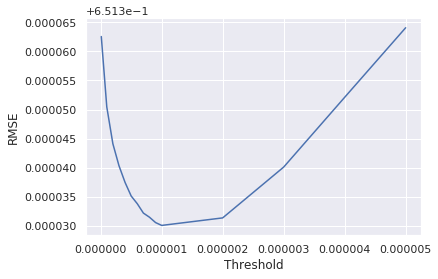

In [421]:
#Part 1 for minimum rmse with train and test data
threshold=[0.00000001,0.0000001,0.0000002,0.0000003,0.0000004,0.0000005,0.0000006,0.0000007,0.0000008,0.0000009,0.000001,0.000002,0.000003,0.000004,0.000005]
alpha=[0.2]
iterations=1000
coefmat=np.zeros((1,len(x1_train[0])),dtype=int)
LinearReg(x1_train,x1_test,y1_train,y1_test,alpha,iterations,coefmat,threshold)

For iteration:  1  RMSE is:  2.825583026116973
For iteration:  2  RMSE is:  2.0048187448381776
For iteration:  3  RMSE is:  1.6193188762122672
For iteration:  4  RMSE is:  1.4469497740858264
For iteration:  5  RMSE is:  1.364635839248507
For iteration:  6  RMSE is:  1.3172354690703674
For iteration:  7  RMSE is:  1.283302702329182
For iteration:  8  RMSE is:  1.254989112657954
For iteration:  9  RMSE is:  1.229446701861177
For iteration:  10  RMSE is:  1.2056087269910962
For iteration:  11  RMSE is:  1.1830420636385424
For iteration:  12  RMSE is:  1.1615437082757782
For iteration:  13  RMSE is:  1.1409984557184139
For iteration:  14  RMSE is:  1.1213278362615446
For iteration:  15  RMSE is:  1.1024711230651763
For iteration:  16  RMSE is:  1.0843777841211932
For iteration:  17  RMSE is:  1.067004139662673
For iteration:  18  RMSE is:  1.0503116461577002
For iteration:  19  RMSE is:  1.0342658638275628
For iteration:  20  RMSE is:  1.018835747560946
For iteration:  21  RMSE is:  1.0039

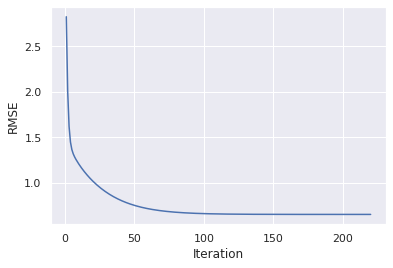

In [350]:
#Error as a function of number of gradient descent iterations for test and train
threshold=[0.000001]
alpha=[0.2]
coefmat=np.zeros((1,len(x1_train[0])),dtype=int)
iterations=1000
itera=[]
rmse=[]
cost_ls=[linear_costfunc(x1_train,y1_train,coefmat)]
gddf=pd.DataFrame(coefmat)
for i in range(1,iterations):
  loss=np.dot(x1_train,coefmat.T)-y1_train
  dep=np.dot(loss.T,x1_train)
  coefmat=coefmat-dep*alpha/len(x1_train)   
  ypredict=predict(coefmat,x1_test)
  rmse+=[linear_rmse(ypredict,y1_test)]
  itera+=[i]
  cost_ls+=[linear_costfunc(x1_train,y1_train,coefmat)]
  if (abs(cost_ls[i]-cost_ls[i-1]))<=threshold:
    break
  print("For iteration: ",i," RMSE is: ", linear_rmse(ypredict,y1_test))
#print("Coeffients: ",min_cost)
plt.plot(itera,rmse)
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.show()

Iterations needed to converge:  177
Cost at convergance:  0.2119256792605373
For threshold= 1e-16  RMSE is:  0.6510386766706526
Coeffients:             0         1         2   ...        12       13        14
176  4.685011  0.411788  0.292572  ... -0.022392 -0.33635 -0.177383

[1 rows x 15 columns]
Iterations needed to converge:  165
Cost at convergance:  0.21192567926054107
For threshold= 1e-15  RMSE is:  0.6510386766706585
Coeffients:             0         1         2   ...        12       13        14
164  4.685011  0.411788  0.292572  ... -0.022392 -0.33635 -0.177383

[1 rows x 15 columns]
Iterations needed to converge:  162
Cost at convergance:  0.21192567926054456
For threshold= 2e-15  RMSE is:  0.6510386766706637
Coeffients:             0         1         2   ...        12       13        14
161  4.685011  0.411788  0.292572  ... -0.022392 -0.33635 -0.177383

[1 rows x 15 columns]
Iterations needed to converge:  160
Cost at convergance:  0.2119256792605484
For threshold= 3e-15 

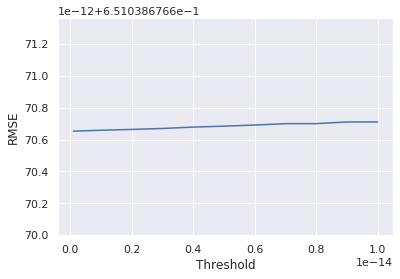

In [431]:
#Part 2 for minimum rmse within training data
#threshold=[0.000000000000001,0.00000000000001,0.0000000000001]
threshold=[0.0000000000000001,0.000000000000001,0.000000000000002,0.000000000000003,0.000000000000004,0.000000000000005,0.000000000000006,0.000000000000007,0.000000000000008,0.000000000000009,0.00000000000001]
alpha=[0.8]
iterations=1000
coefmat=np.zeros((1,len(x1_train[0])),dtype=int)
LinearReg(x1_train,x1_train,y1_train,y1_train,alpha,iterations,coefmat,threshold)

For iteration:  1  RMSE is:  3.14707415713957
For iteration:  2  RMSE is:  2.306486286617803
For iteration:  3  RMSE is:  1.7590954260192595
For iteration:  4  RMSE is:  1.4090173128713852
For iteration:  5  RMSE is:  1.1875250079022268
For iteration:  6  RMSE is:  1.0463530430326704
For iteration:  7  RMSE is:  0.9535778920205156
For iteration:  8  RMSE is:  0.8895826730232652
For iteration:  9  RMSE is:  0.843010196870902
For iteration:  10  RMSE is:  0.8074876099030363
For iteration:  11  RMSE is:  0.779435567685104
For iteration:  12  RMSE is:  0.756776978838802
For iteration:  13  RMSE is:  0.738231858981681
For iteration:  14  RMSE is:  0.7229486439886148
For iteration:  15  RMSE is:  0.7103156054878904
For iteration:  16  RMSE is:  0.6998648306420224
For iteration:  17  RMSE is:  0.6912225928180873
For iteration:  18  RMSE is:  0.6840826110597146
For iteration:  19  RMSE is:  0.6781905309659516
For iteration:  20  RMSE is:  0.6733339538971372
For iteration:  21  RMSE is:  0.6693

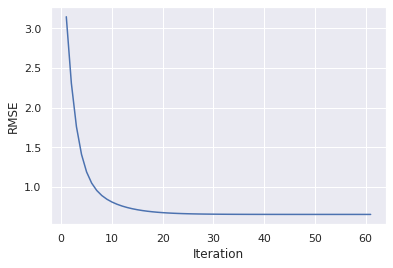

In [352]:
#Error as a function of number of gradient descent iterations within train
threshold=[0.000001]
alpha=[0.8]
coefmat=np.zeros((1,len(x1_train[0])),dtype=int)
iterations=1000
itera=[]
rmse=[]
cost_ls=[linear_costfunc(x1_train,y1_train,coefmat)]
gddf=pd.DataFrame(coefmat)
for i in range(1,iterations):
  loss=np.dot(x1_train,coefmat.T)-y1_train
  dep=np.dot(loss.T,x1_train)
  coefmat=coefmat-dep*alpha/len(x1_train)   
  ypredict=predict(coefmat,x1_train)
  rmse+=[linear_rmse(ypredict,y1_train)]
  itera+=[i]
  cost_ls+=[linear_costfunc(x1_train,y1_train,coefmat)]
  if (abs(cost_ls[i]-cost_ls[i-1]))<=threshold:
    break
  print("For iteration: ",i," RMSE is: ", linear_rmse(ypredict,y1_train))
#print("Coeffients: ",min_cost)
plt.plot(itera,rmse)
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.show()

#Experiment 3 - choosing 8 random features

In [0]:
iterations=1000
coefmat=np.zeros((1,len(x1_train[0])),dtype=int)
df_target=df2[['target']].values
features=df2.drop(columns=['target','Runtime','intercept'])
df_feat=features.sample(axis = 1,random_state=0,n=8) 
df_feat.insert(0,'intercept',1)
df_features=df_feat.values
x1_train, x1_test, y1_train, y1_test = train_test_split(df_features, df_target, test_size = 0.2, random_state = 0)

In [433]:
#Random 8 features for test and train
threshold=[0.000001]
alpha=[0.2]
coefmat=np.zeros((1,len(x1_train[0])),dtype=int)
iterations=1000
print('For features: ', df_feat.columns)
LinearReg(x1_train,x1_test,y1_train,y1_test,alpha,iterations,coefmat,threshold)

For features:  Index(['intercept', 'VWM', 'NDIMB', 'NDIMC', 'STRN', 'KWG', 'SB', 'VWN',
       'NWG'],
      dtype='object')
Iterations needed to converge:  168
Cost at convergance:  0.31505173834662137
For threshold= [1e-06]  and learning rate:  [0.2]  RMSE is:  0.7914725914092466
Coeffients:             0         1         2         3  ...       5        6         7         8
167  4.45463  0.154924 -0.051709 -0.172248  ... -0.0015 -0.20531 -0.053809  0.234157

[1 rows x 9 columns]


0.7914725914092466

In [434]:
#Random 8 features within train
threshold=[0.000001]
alpha=[0.8]
coefmat=np.zeros((1,len(x1_train[0])),dtype=int)
iterations=1000
print('For features: ', df_feat.columns)
LinearReg(x1_train,x1_train,y1_train,y1_train,alpha,iterations,coefmat,threshold)

For features:  Index(['intercept', 'VWM', 'NDIMB', 'NDIMC', 'STRN', 'KWG', 'SB', 'VWN',
       'NWG'],
      dtype='object')
Iterations needed to converge:  47
Cost at convergance:  0.3150394638170661
For threshold= [1e-06]  and learning rate:  [0.8]  RMSE is:  0.793775111498296
Coeffients:             0         1         2  ...         6         7         8
46  4.459673  0.154886 -0.051694  ... -0.209588 -0.053788  0.234047

[1 rows x 9 columns]


0.793775111498296

#Experiment 4 - Choosing 8 best features

In [438]:
#Fixed 8 features for test and train
iterations=1000
df_target=df2[['target']].values
features=df2.drop(columns=['target','Runtime','intercept'])
ls=['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'STRM', 'SA', 'SB']
df_feat=features[ls] 
df_feat.insert(0,'intercept',1)
df_features=df_feat.values
x1_train, x1_test, y1_train, y1_test = train_test_split(df_features, df_target, test_size = 0.2, random_state = 0)
threshold=[0.000001]
alpha=[0.2]
coefmat=np.zeros((1,len(x1_train[0])),dtype=int)
print('For features: ', df_feat.columns)
LinearReg(x1_train,x1_test,y1_train,y1_test,alpha,iterations,coefmat,threshold)

For features:  Index(['intercept', 'MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'STRM', 'SA', 'SB'], dtype='object')
Iterations needed to converge:  196
Cost at convergance:  0.21374897029250228
For threshold= [1e-06]  and learning rate:  [0.2]  RMSE is:  0.6541226353847178
Coeffients:              0         1         2  ...         6         7        8
195  4.662784  0.401283  0.270036  ... -0.142249 -0.329808 -0.17103

[1 rows x 9 columns]


0.6541226353847178

For seed= 0
For features:  Index(['intercept', 'VWM', 'NDIMB', 'NDIMC', 'STRN', 'KWG', 'SB', 'VWN',
       'NWG'],
      dtype='object')
Iterations needed to converge:  168
Cost at convergance:  0.31505173834662137
For threshold= [1e-06]  and learning rate:  [0.2]  RMSE is:  0.7914725914092466
Coeffients:             0         1         2         3  ...       5        6         7         8
167  4.45463  0.154924 -0.051709 -0.172248  ... -0.0015 -0.20531 -0.053809  0.234157

[1 rows x 9 columns]
For seed= 1
For features:  Index(['intercept', 'MDIMC', 'KWI', 'NDIMB', 'KWG', 'STRM', 'NDIMC', 'NWG',
       'SA'],
      dtype='object')
Iterations needed to converge:  171
Cost at convergance:  0.29373860009977343
For threshold= [1e-06]  and learning rate:  [0.2]  RMSE is:  0.7639238388042763
Coeffients:              0         1         2  ...        6         7         8
170  4.594964 -0.212606 -0.027937  ... -0.22474  0.217416 -0.362656

[1 rows x 9 columns]
For seed= 2
For features:  Index

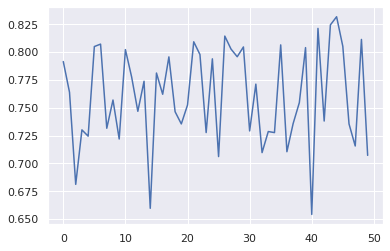

In [435]:
#Random 8 features for test and train loop to validate
iterations=1000
coefmat=np.zeros((1,len(x1_train[0])),dtype=int)
df_target=df2[['target']].values
features=df2.drop(columns=['target','Runtime','intercept'])
itera=[]
lsrmse=[]
for i in range(50):
  print('For seed=', i)
  df_feat=features.sample(axis = 1,random_state=i,n=8) 
  df_feat.insert(0,'intercept',1)
  df_features=df_feat.values
  x1_train, x1_test, y1_train, y1_test = train_test_split(df_features, df_target, test_size = 0.2, random_state = 0)
  threshold=[0.000001]
  alpha=[0.2]
  coefmat=np.zeros((1,len(x1_train[0])),dtype=int)
  iterations=1000
  print('For features: ', df_feat.columns)
  r=LinearReg(x1_train,x1_test,y1_train,y1_test,alpha,iterations,coefmat,threshold)
  itera+=[i]
  lsrmse+=[r]
plt.plot(itera,lsrmse)

In [439]:
#Random 8 features within train
iterations=1000
df_target=df2[['target']].values
features=df2.drop(columns=['target','Runtime','intercept'])
ls=['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'STRM', 'SA', 'SB']
df_feat=features[ls] 
df_feat.insert(0,'intercept',1)
df_features=df_feat.values
x1_train, x1_test, y1_train, y1_test = train_test_split(df_features, df_target, test_size = 0.2, random_state = 0)
threshold=[0.000001]
alpha=[0.8]
coefmat=np.zeros((1,len(x1_train[0])),dtype=int)
print('For features: ', df_feat.columns)
LinearReg(x1_train,x1_test,y1_train,y1_test,alpha,iterations,coefmat,threshold)

For features:  Index(['intercept', 'MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'STRM', 'SA', 'SB'], dtype='object')
Iterations needed to converge:  55
Cost at convergance:  0.2137351465200449
For threshold= [1e-06]  and learning rate:  [0.8]  RMSE is:  0.654130659518201
Coeffients:             0         1         2  ...         6         7         8
54  4.669096  0.401113  0.269864  ... -0.146071 -0.333451 -0.174663

[1 rows x 9 columns]


0.654130659518201

For seed= 0
For features:  Index(['intercept', 'VWM', 'NDIMB', 'NDIMC', 'STRN', 'KWG', 'SB', 'VWN',
       'NWG'],
      dtype='object')
Iterations needed to converge:  168
Cost at convergance:  0.31505173834662137
For threshold= [1e-06]  and learning rate:  [0.2]  RMSE is:  0.793790574832709
Coeffients:             0         1         2         3  ...       5        6         7         8
167  4.45463  0.154924 -0.051709 -0.172248  ... -0.0015 -0.20531 -0.053809  0.234157

[1 rows x 9 columns]
For seed= 1
For features:  Index(['intercept', 'MDIMC', 'KWI', 'NDIMB', 'KWG', 'STRM', 'NDIMC', 'NWG',
       'SA'],
      dtype='object')
Iterations needed to converge:  171
Cost at convergance:  0.29373860009977343
For threshold= [1e-06]  and learning rate:  [0.2]  RMSE is:  0.7664706127435981
Coeffients:              0         1         2  ...        6         7         8
170  4.594964 -0.212606 -0.027937  ... -0.22474  0.217416 -0.362656

[1 rows x 9 columns]
For seed= 2
For features:  Index(

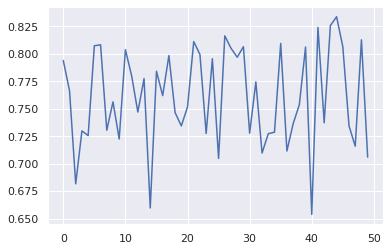

In [437]:
#Random 8 features within train loop to validate
iterations=1000
coefmat=np.zeros((1,len(x1_train[0])),dtype=int)
df_target=df2[['target']].values
features=df2.drop(columns=['target','Runtime','intercept'])
itera=[]
lsrmse=[]
for i in range(50):
  print('For seed=', i)
  df_feat=features.sample(axis = 1,random_state=i,n=8) 
  df_feat.insert(0,'intercept',1)
  df_features=df_feat.values
  x1_train, x1_test, y1_train, y1_test = train_test_split(df_features, df_target, test_size = 0.2, random_state = 0)
  threshold=[0.000001]
  alpha=[0.2]
  coefmat=np.zeros((1,len(x1_train[0])),dtype=int)
  iterations=1000
  print('For features: ', df_feat.columns)
  r=LinearReg(x1_train,x1_train,y1_train,y1_train,alpha,iterations,coefmat,threshold)
  itera+=[i]
  lsrmse+=[r]
plt.plot(itera,lsrmse)

#**Logistic Regression**

In [440]:
iterations=1000
mean = df2['target'].mean()
df2.loc[df2['target'] <= mean, 'target'] = 0
df2.loc[df2['target'] > mean, 'target'] = 1
df_target=df2[['target']].values
df_features=df2.drop(columns=['target','Runtime'],axis=1).values
x1_train, x1_test, y1_train, y1_test = train_test_split(df_features, df_target, test_size = 0.2, random_state = 0)
coefmat=np.zeros((1,len(x1_train[0])),dtype=int)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [0]:
def sigmoid(dfile,coefmat):
  y_hat=np.dot(dfile,coefmat.T)
  z=1/(1+np.exp(-y_hat))
  return z

In [0]:
#define cost function
def logit_costfunc(dfile,targetvar,coefmat):
  fterm=np.sum(np.dot(targetvar.T,np.log(sigmoid(dfile,coefmat))))
  sterm=np.sum(np.dot((1-targetvar).T,np.log(1-sigmoid(dfile,coefmat))))
  cost=-(fterm+sterm)/len(dfile)
  return cost

In [0]:
#define gradient decent considering fixed iterations
def logit_gdesc(dfile,targetvar,coefmat,alpha,iterations,threshold):
  cost_ls=[logit_costfunc(dfile,targetvar,coefmat)]
  gddf=pd.DataFrame(coefmat)
  for i in range(1,iterations):
    loss=sigmoid(dfile,coefmat)-targetvar
    dep=np.dot(loss.T,dfile)
    coefmat=coefmat-dep*alpha/len(dfile)   
    #print('matrix: ',coefmat)
    gddf=gddf.append(pd.DataFrame(coefmat),ignore_index=True)
    cost_ls+=[logit_costfunc(dfile,targetvar,coefmat)]
    #print('iteration=',i,' cost_ls:',cost_ls)
    if (abs(cost_ls[i]-cost_ls[i-1]))<=threshold:
      break
  gddf['cost']=cost_ls
  #print(gddf)
  print("Iterations needed to converge: ", i+1)
  min_cost=gddf[gddf.cost==min(gddf.cost)]
  print('Cost at convergance: ', cost_ls[i])
  min_cost=min_cost.drop(columns='cost')
  return min_cost

In [0]:
def log_predict(cost_mat,xtest):
  predic_target=xtest.dot(cost_mat.T)
  target= np.where(predic_target >= 0.5 , 1, 0)
  return target

In [0]:
def accuracy(ypredict,ytest):
  df = pd.DataFrame({'actual': ytest.flatten(), 'predicted': ypredict.flatten()})
  correct= df.loc[df['actual'] == df['predicted']]
  rate=len(correct)/len(ytest)   
  return rate

In [0]:
def LogisticReg(x1_train,x1_test,y1_train,y1_test,alpha,iterations,coefmat,threshold):
  if len(alpha)>1:
    coef_ls=[0]*len(alpha)
    ypredict=[0]*len(alpha)
    accu=[0]*len(alpha)
    for i, a in enumerate(alpha, start=0):
      coef_ls[i]=logit_gdesc(x1_train,y1_train,coefmat,a,iterations,threshold)
      ypredict[i]=log_predict(coef_ls[i],x1_test)
      accu[i]=accuracy(ypredict[i],y1_test)
      print("For learning rate=", a, " Accuracy is: ", accu[i])
      print("Coeffients: ",coef_ls[i])
    plt.plot(alpha,accu)
    plt.xlabel('Learning Rate')
    plt.ylabel('Accuracy')
    plt.show()
  elif len(threshold)>1:
    coef_ls=[0]*len(threshold)
    ypredict=[0]*len(threshold)
    accu=[0]*len(threshold)
    for i, t in enumerate(threshold, start=0):
      #print('t',t)
      coef_ls[i]=logit_gdesc(x1_train,y1_train,coefmat,alpha,iterations,t)
      ypredict[i]=log_predict(coef_ls[i],x1_test)
      #print('y_hat:',ypredict)
      accu[i]=accuracy(ypredict[i],y1_test)
      print("For threshold=", t, " Accuracy is: ", accu[i])
      print("Coeffients: ",coef_ls[i])
    plt.plot(threshold,accu)
    plt.xlabel('Threshold')
    plt.ylabel('Accuracy')
    plt.show()
  else:
    coef_ls=[0]
    ypredict=[0]
    accu=[0]
    for i in range(1):
      coef_ls[i]=logit_gdesc(x1_train,y1_train,coefmat,alpha,iterations,threshold)
      ypredict[i]=log_predict(coef_ls[i],x1_test)
      accu[i]=accuracy(ypredict[i],y1_test)
      print("For threshold=", threshold," and learning rate: ",alpha, " Accuracy is: ", accu[i])
      print("Coeffients: ",coef_ls[i])
    return accu[i]

#Experiment 1 - varying learning rate, fixed iterations

Iterations needed to converge:  779
Cost at convergance:  0.4767912228102756
For learning rate= 0.1  Accuracy is:  0.8286359298996905
Coeffients:            0        1         2   ...        12        13        14
778 -0.08084  1.35496  0.983318  ... -0.063142 -0.562739 -0.197727

[1 rows x 15 columns]
Iterations needed to converge:  446
Cost at convergance:  0.47671011010292547
For learning rate= 0.2  Accuracy is:  0.8288686666511509
Coeffients:             0         1         2   ...        12        13        14
445 -0.069403  1.366596  0.992815  ... -0.065145 -0.575139 -0.200715

[1 rows x 15 columns]
Iterations needed to converge:  321
Cost at convergance:  0.47668102593046835
For learning rate= 0.3  Accuracy is:  0.8291014034026113
Coeffients:            0         1         2   ...       12        13        14
320 -0.06314  1.371733  0.996985  ... -0.06646 -0.581272 -0.202446

[1 rows x 15 columns]
Iterations needed to converge:  254
Cost at convergance:  0.4766657533586892
For l

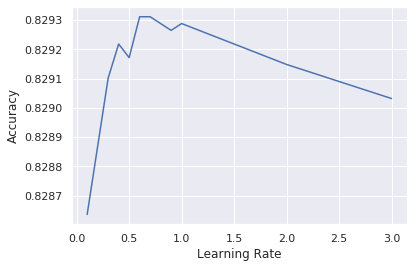

In [447]:
#Part 1 for minimum rmse with train and test data
threshold=[0.000001]
alpha=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3]
LogisticReg(x1_train,x1_test,y1_train,y1_test,alpha,iterations,coefmat,threshold)

Iterations needed to converge:  1000
Cost at convergance:  0.6847620434787466
For learning rate= 0.0001  Accuracy is:  0.6137035399259897
Coeffients:             0         1         2   ...        12        13       14
999 -0.010611  0.017308  0.009453  ... -0.005595 -0.008282 -0.00675

[1 rows x 15 columns]
Iterations needed to converge:  1000
Cost at convergance:  0.6296862866529587
For learning rate= 0.001  Accuracy is:  0.6137733609514279
Coeffients:             0         1         2   ...        12        13        14
999 -0.083034  0.155565  0.087283  ... -0.043138 -0.069041 -0.054151

[1 rows x 15 columns]
Iterations needed to converge:  1000
Cost at convergance:  0.5107356948436947
For learning rate= 0.01  Accuracy is:  0.7512742337142458
Coeffients:             0         1         2   ...       12       13        14
999 -0.186395  0.783967  0.512249  ... -0.08399 -0.27492 -0.155333

[1 rows x 15 columns]
Iterations needed to converge:  779
Cost at convergance:  0.4767912228102

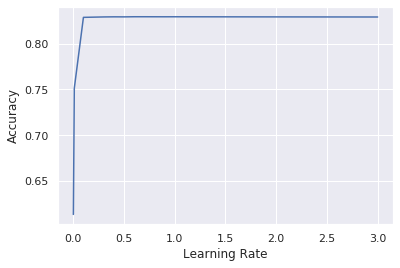

In [449]:
threshold=[0.000001]
alpha=[0.0001,0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3]
LogisticReg(x1_train,x1_test,y1_train,y1_test,alpha,iterations,coefmat,threshold)

Iterations needed to converge:  779
Cost at convergance:  0.4767912228102756
For learning rate= 0.1  Accuracy is:  0.8275633342255012
Coeffients:            0        1         2   ...        12        13        14
778 -0.08084  1.35496  0.983318  ... -0.063142 -0.562739 -0.197727

[1 rows x 15 columns]
Iterations needed to converge:  446
Cost at convergance:  0.47671011010292547
For learning rate= 0.2  Accuracy is:  0.8279357173612
Coeffients:             0         1         2   ...        12        13        14
445 -0.069403  1.366596  0.992815  ... -0.065145 -0.575139 -0.200715

[1 rows x 15 columns]
Iterations needed to converge:  321
Cost at convergance:  0.47668102593046835
For learning rate= 0.3  Accuracy is:  0.8279473543341906
Coeffients:            0         1         2   ...       12        13        14
320 -0.06314  1.371733  0.996985  ... -0.06646 -0.581272 -0.202446

[1 rows x 15 columns]
Iterations needed to converge:  254
Cost at convergance:  0.4766657533586892
For lear

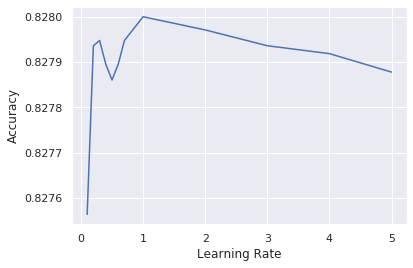

In [448]:
#Part 2 for minimum rmse within training data
threshold=[0.000001]
alpha=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5]
LogisticReg(x1_train,x1_train,y1_train,y1_train,alpha,iterations,coefmat,threshold)

Iterations needed to converge:  1000
Cost at convergance:  0.6847620434787466
For learning rate= 0.0001  Accuracy is:  0.609276994868095
Coeffients:             0         1         2   ...        12        13       14
999 -0.010611  0.017308  0.009453  ... -0.005595 -0.008282 -0.00675

[1 rows x 15 columns]
Iterations needed to converge:  1000
Cost at convergance:  0.6563724098848411
For learning rate= 0.0005  Accuracy is:  0.609276994868095
Coeffients:             0         1         2   ...        12        13        14
999 -0.047454  0.082436  0.045584  ... -0.024861 -0.038078 -0.030517

[1 rows x 15 columns]
Iterations needed to converge:  1000
Cost at convergance:  0.6296862866529587
For learning rate= 0.001  Accuracy is:  0.6093875461115055
Coeffients:             0         1         2   ...        12        13        14
999 -0.083034  0.155565  0.087283  ... -0.043138 -0.069041 -0.054151

[1 rows x 15 columns]
Iterations needed to converge:  1000
Cost at convergance:  0.54357467

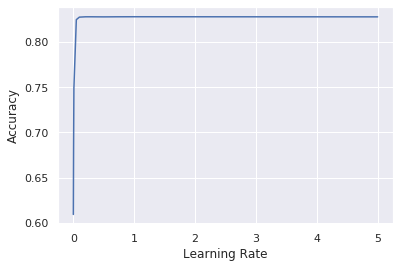

In [450]:
threshold=[0.000001]
alpha=[0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5]
LogisticReg(x1_train,x1_train,y1_train,y1_train,alpha,iterations,coefmat,threshold)

#Experiment 2 - varying threshold with best alpha

Iterations needed to converge:  206
Cost at convergance:  0.47663336996974043
For threshold= 5e-07  Accuracy is:  0.8291014034026113
Coeffients:             0         1         2   ...        12        13        14
205 -0.044639  1.382405  1.005559  ... -0.071304 -0.596817 -0.208076

[1 rows x 15 columns]
Iterations needed to converge:  182
Cost at convergance:  0.4766501892297705
For threshold= 1e-06  Accuracy is:  0.8293108664789257
Coeffients:             0         1         2   ...        12       13        14
181 -0.053368  1.378225  1.002224  ... -0.068819 -0.58999 -0.205303

[1 rows x 15 columns]
Iterations needed to converge:  161
Cost at convergance:  0.4766793176383365
For threshold= 2e-06  Accuracy is:  0.8291944981031955
Coeffients:             0         1         2   ...       12        13       14
160 -0.062902  1.372181  0.997353  ... -0.06646 -0.581647 -0.20249

[1 rows x 15 columns]
Iterations needed to converge:  149
Cost at convergance:  0.47670768001097896
For thres

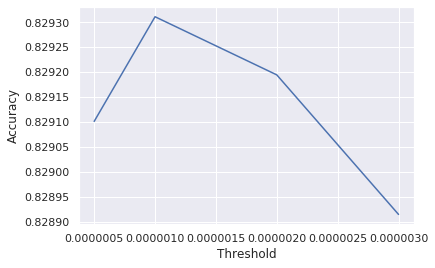

In [367]:
#Part 1 for minimum rmse with train and test data
threshold=[0.0000005,0.000001,0.000002,0.000003]
alpha=[0.4]
iterations=1000
coefmat=np.zeros((1,len(x1_train[0])),dtype=int)
LogisticReg(x1_train,x1_test,y1_train,y1_test,alpha,iterations,coefmat,threshold)

For iteration:  1  accuracy is:  0.6137035399259897
For iteration:  2  accuracy is:  0.6153094235110667
For iteration:  3  accuracy is:  0.623804314939372
For iteration:  4  accuracy is:  0.6383270882305024
For iteration:  5  accuracy is:  0.6524076616938581
For iteration:  6  accuracy is:  0.6650219936230131
For iteration:  7  accuracy is:  0.6763097260688435
For iteration:  8  accuracy is:  0.6866897851839784
For iteration:  9  accuracy is:  0.6965810971210464
For iteration:  10  accuracy is:  0.7058905671794633
For iteration:  11  accuracy is:  0.7149673004864198
For iteration:  12  accuracy is:  0.7230665394372425
For iteration:  13  accuracy is:  0.7307701259105825
For iteration:  14  accuracy is:  0.7374496706774967
For iteration:  15  accuracy is:  0.7444317732213094
For iteration:  16  accuracy is:  0.750832033886471
For iteration:  17  accuracy is:  0.7566271789978356
For iteration:  18  accuracy is:  0.7612586403518979
For iteration:  19  accuracy is:  0.7659599227313986
For 

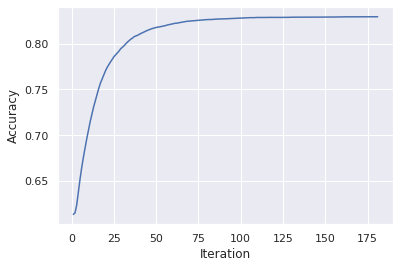

In [368]:
#Error as a function of number of gradient descent iterations for test and train
threshold=[0.000001]
alpha=[0.6]
coefmat=np.zeros((1,len(x1_train[0])),dtype=int)
iterations=1000
itera=[]
accu=[]
cost_ls=[logit_costfunc(x1_train,y1_train,coefmat)]
gddf=pd.DataFrame(coefmat)
for i in range(1,iterations):
  loss=sigmoid(x1_train,coefmat)-y1_train
  dep=np.dot(loss.T,x1_train)
  coefmat=coefmat-dep*alpha/len(x1_train)   
  ypredict=log_predict(coefmat,x1_test)
  accu+=[accuracy(ypredict,y1_test)]
  itera+=[i]
  cost_ls+=[logit_costfunc(x1_train,y1_train,coefmat)]
  if (abs(cost_ls[i]-cost_ls[i-1]))<=threshold:
    break
  print("For iteration: ",i," accuracy is: ", accuracy(ypredict,y1_test))
#print("Coeffients: ",min_cost)
plt.plot(itera,accu)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.show()

Iterations needed to converge:  174
Cost at convergance:  0.4766167520340487
For threshold= 1e-07  Accuracy is:  0.8288686666511509
Coeffients:             0         1         2   ...        12        13        14
173 -0.026594  1.387572  1.009576  ... -0.077472 -0.608649 -0.214527

[1 rows x 15 columns]
Iterations needed to converge:  135
Cost at convergance:  0.4766259886024456
For threshold= 5e-07  Accuracy is:  0.8292177717783416
Coeffients:             0         1         2   ...        12        13        14
134 -0.039019  1.384577  1.007276  ... -0.073044 -0.600886 -0.209956

[1 rows x 15 columns]
Iterations needed to converge:  120
Cost at convergance:  0.4766362532581446
For threshold= 1e-06  Accuracy is:  0.8292875928037796
Coeffients:             0         1        2         3   ...       11        12       13       14
119 -0.046572  1.381744  1.00504  0.114016  ... -0.48484 -0.070684 -0.59547 -0.20742

[1 rows x 15 columns]
Iterations needed to converge:  106
Cost at conver

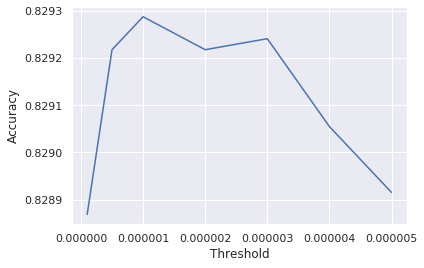

In [451]:
#Part 2 for minimum rmse within training data
threshold=[0.0000001,0.0000005,0.000001,0.000002,0.000003,0.000004,0.000005]
alpha=[1]
iterations=1000
coefmat=np.zeros((1,len(x1_train[0])),dtype=int)
LogisticReg(x1_train,x1_test,y1_train,y1_test,alpha,iterations,coefmat,threshold)

For iteration:  1  accuracy is:  0.610033398112483
For iteration:  2  accuracy is:  0.6265229888401429
For iteration:  3  accuracy is:  0.6512341009856516
For iteration:  4  accuracy is:  0.67226211117964
For iteration:  5  accuracy is:  0.6902470529365902
For iteration:  6  accuracy is:  0.7063817159880372
For iteration:  7  accuracy is:  0.7213119523349586
For iteration:  8  accuracy is:  0.7343628175439004
For iteration:  9  accuracy is:  0.7451386545331828
For iteration:  10  accuracy is:  0.7545122362770996
For iteration:  11  accuracy is:  0.7623846485052308
For iteration:  12  accuracy is:  0.7691980961912187
For iteration:  13  accuracy is:  0.7748478465781481
For iteration:  14  accuracy is:  0.7798808373965764
For iteration:  15  accuracy is:  0.7844890787008484
For iteration:  16  accuracy is:  0.7881314512469016
For iteration:  17  accuracy is:  0.7916283616305727
For iteration:  18  accuracy is:  0.7948285292029837
For iteration:  19  accuracy is:  0.7975457623962855
For i

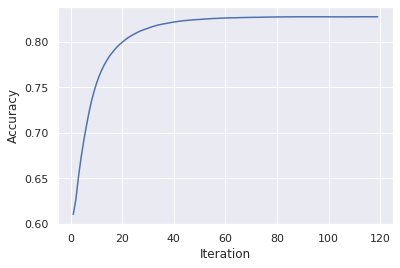

In [370]:
#Error as a function of number of gradient descent iterations within train
threshold=[0.000001]
alpha=[1]
coefmat=np.zeros((1,len(x1_train[0])),dtype=int)
iterations=1000
itera=[]
accu=[]
cost_ls=[logit_costfunc(x1_train,y1_train,coefmat)]
gddf=pd.DataFrame(coefmat)
for i in range(1,iterations):
  loss=sigmoid(x1_train,coefmat)-y1_train
  dep=np.dot(loss.T,x1_train)
  coefmat=coefmat-dep*alpha/len(x1_train)   
  ypredict=log_predict(coefmat,x1_train)
  accu+=[accuracy(ypredict,y1_train)]
  itera+=[i]
  cost_ls+=[logit_costfunc(x1_train,y1_train,coefmat)]
  if (abs(cost_ls[i]-cost_ls[i-1]))<=threshold:
    break
  print("For iteration: ",i," accuracy is: ", accuracy(ypredict,y1_train))
#print("Coeffients: ",min_cost)
plt.plot(itera,accu)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.show()

#Experiment 3 - choosing 8 random features

In [452]:
iterations=1000
coefmat=np.zeros((1,len(x1_train[0])),dtype=int)
mean = df2['target'].mean()
df2.loc[df2['target'] <= mean, 'target'] = 0
df2.loc[df2['target'] > mean, 'target'] = 1
df_target=df2[['target']].values
features=df2.drop(columns=['target','Runtime','intercept'])
df_feat=features.sample(axis = 1,random_state=0,n=8) 
df_feat.insert(0,'intercept',1)
df_features=df_feat.values
x1_train, x1_test, y1_train, y1_test = train_test_split(df_features, df_target, test_size = 0.2, random_state = 0)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [453]:
#Random 8 features for test and train
threshold=[0.000001]
alpha=[0.6]
coefmat=np.zeros((1,len(x1_train[0])),dtype=int)
iterations=1000
print('For features: ', df_feat.columns)
LogisticReg(x1_train,x1_test,y1_train,y1_test,alpha,iterations,coefmat,threshold)

For features:  Index(['intercept', 'VWM', 'NDIMB', 'NDIMC', 'STRN', 'KWG', 'SB', 'VWN',
       'NWG'],
      dtype='object')
Iterations needed to converge:  68
Cost at convergance:  0.6204304767901392
For threshold= [1e-06]  and learning rate:  [0.6]  Accuracy is:  0.6655107408010799
Coeffients:             0         1         2  ...         6         7         8
67 -0.329137  0.361727 -0.114688  ... -0.244988 -0.095046  0.557819

[1 rows x 9 columns]


0.6655107408010799

In [454]:
#Random 8 features within train
threshold=[0.000001]
alpha=[1]
coefmat=np.zeros((1,len(x1_train[0])),dtype=int)
iterations=1000
print('For features: ', df_feat.columns)
LogisticReg(x1_train,x1_train,y1_train,y1_train,alpha,iterations,coefmat,threshold)

For features:  Index(['intercept', 'VWM', 'NDIMB', 'NDIMC', 'STRN', 'KWG', 'SB', 'VWN',
       'NWG'],
      dtype='object')
Iterations needed to converge:  45
Cost at convergance:  0.6204254470342226
For threshold= [1e-06]  and learning rate:  [1]  Accuracy is:  0.6617306506231599
Coeffients:             0         1         2  ...         6         7         8
44 -0.330598  0.362218 -0.115713  ... -0.246034 -0.096844  0.559996

[1 rows x 9 columns]


0.6617306506231599

#Experiment 4 - Choosing 8 best features

In [455]:
iterations=1000
coefmat=np.zeros((1,len(x1_train[0])),dtype=int)
mean = df2['target'].mean()
df2.loc[df2['target'] <= mean, 'target'] = 0
df2.loc[df2['target'] > mean, 'target'] = 1
df_target=df2[['target']].values
features=df2.drop(columns=['target','Runtime','intercept'])
ls=['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'STRM', 'SA', 'SB']
df_feat=features[ls] 
df_feat.insert(0,'intercept',1)
df_features=df_feat.values
x1_train, x1_test, y1_train, y1_test = train_test_split(df_features, df_target, test_size = 0.2, random_state = 0)
threshold=[0.000001]
alpha=[0.6]
coefmat=np.zeros((1,len(x1_train[0])),dtype=int)
print('For features: ', df_feat.columns)
LogisticReg(x1_train,x1_test,y1_train,y1_test,alpha,iterations,coefmat,threshold)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


For features:  Index(['intercept', 'MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'STRM', 'SA', 'SB'], dtype='object')
Iterations needed to converge:  171
Cost at convergance:  0.4785921820114619
For threshold= [1e-06]  and learning rate:  [0.6]  Accuracy is:  0.8364093373984686
Coeffients:              0         1         2  ...         6         7         8
170 -0.090581  1.334991  0.942332  ... -0.476233 -0.585777 -0.203941

[1 rows x 9 columns]


0.8364093373984686

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


For seed= 0
For features:  Index(['intercept', 'VWM', 'NDIMB', 'NDIMC', 'STRN', 'KWG', 'SB', 'VWN',
       'NWG'],
      dtype='object')
Iterations needed to converge:  68
Cost at convergance:  0.6204304767901392
For threshold= [1e-06]  and learning rate:  [0.6]  Accuracy is:  0.6655107408010799
Coeffients:             0         1         2  ...         6         7         8
67 -0.329137  0.361727 -0.114688  ... -0.244988 -0.095046  0.557819

[1 rows x 9 columns]
For seed= 1
For features:  Index(['intercept', 'MDIMC', 'KWI', 'NDIMB', 'KWG', 'STRM', 'NDIMC', 'NWG',
       'SA'],
      dtype='object')
Iterations needed to converge:  124
Cost at convergance:  0.6055921647969806
For threshold= [1e-06]  and learning rate:  [0.6]  Accuracy is:  0.6634393837130821
Coeffients:              0         1         2  ...         6         7         8
123 -0.080879 -0.493977 -0.004491  ... -0.476245  0.550949 -0.523773

[1 rows x 9 columns]
For seed= 2
For features:  Index(['intercept', 'STRN', 'NDI

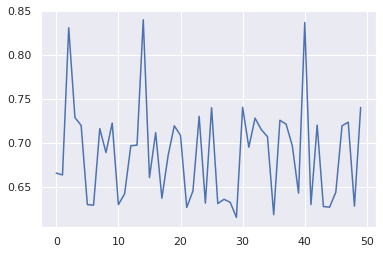

In [457]:
#Random 8 features for test and train for loop to validate
iterations=1000
coefmat=np.zeros((1,len(x1_train[0])),dtype=int)
mean = df2['target'].mean()
df2.loc[df2['target'] <= mean, 'target'] = 0
df2.loc[df2['target'] > mean, 'target'] = 1
df_target=df2[['target']].values
features=df2.drop(columns=['target','Runtime','intercept'])
itera=[]
lsaccu=[]
for i in range(50):
  print('For seed=', i)
  df_feat=features.sample(axis = 1,random_state=i,n=8) 
  df_feat.insert(0,'intercept',1)
  df_features=df_feat.values
  x1_train, x1_test, y1_train, y1_test = train_test_split(df_features, df_target, test_size = 0.2, random_state = 0)
  threshold=[0.000001]
  alpha=[0.6]
  coefmat=np.zeros((1,len(x1_train[0])),dtype=int)
  iterations=1000
  print('For features: ', df_feat.columns)
  a=LogisticReg(x1_train,x1_test,y1_train,y1_test,alpha,iterations,coefmat,threshold)
  itera+=[i]
  lsaccu+=[a]
plt.plot(itera,lsaccu)

In [456]:
iterations=1000
coefmat=np.zeros((1,len(x1_train[0])),dtype=int)
mean = df2['target'].mean()
df2.loc[df2['target'] <= mean, 'target'] = 0
df2.loc[df2['target'] > mean, 'target'] = 1
df_target=df2[['target']].values
features=df2.drop(columns=['target','Runtime','intercept'])
ls=['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'STRM', 'SA', 'SB']
df_feat=features[ls] 
df_feat.insert(0,'intercept',1)
df_features=df_feat.values
x1_train, x1_test, y1_train, y1_test = train_test_split(df_features, df_target, test_size = 0.2, random_state = 0)
threshold=[0.000001]
alpha=[1]
coefmat=np.zeros((1,len(x1_train[0])),dtype=int)
print('For features: ', df_feat.columns)
LogisticReg(x1_train,x1_test,y1_train,y1_test,alpha,iterations,coefmat,threshold)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


For features:  Index(['intercept', 'MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'STRM', 'SA', 'SB'], dtype='object')
Iterations needed to converge:  113
Cost at convergance:  0.4785788907964668
For threshold= [1e-06]  and learning rate:  [1]  Accuracy is:  0.8368748109013895
Coeffients:              0         1         2  ...         6         7         8
112 -0.084125  1.337817  0.944534  ... -0.482048 -0.591699 -0.206099

[1 rows x 9 columns]


0.8368748109013895

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


For seed= 0
For features:  Index(['intercept', 'VWM', 'NDIMB', 'NDIMC', 'STRN', 'KWG', 'SB', 'VWN',
       'NWG'],
      dtype='object')
Iterations needed to converge:  45
Cost at convergance:  0.6204254470342226
For threshold= [1e-06]  and learning rate:  [1]  Accuracy is:  0.6617306506231599
Coeffients:             0         1         2  ...         6         7         8
44 -0.330598  0.362218 -0.115713  ... -0.246034 -0.096844  0.559996

[1 rows x 9 columns]
For seed= 1
For features:  Index(['intercept', 'MDIMC', 'KWI', 'NDIMB', 'KWG', 'STRM', 'NDIMC', 'NWG',
       'SA'],
      dtype='object')
Iterations needed to converge:  82
Cost at convergance:  0.6055823564298639
For threshold= [1e-06]  and learning rate:  [1]  Accuracy is:  0.6602993029453179
Coeffients:            0         1         2  ...         6         7         8
81 -0.07548 -0.494169 -0.004513  ... -0.476446  0.551126 -0.529052

[1 rows x 9 columns]
For seed= 2
For features:  Index(['intercept', 'STRN', 'NDIMC', 'MDI

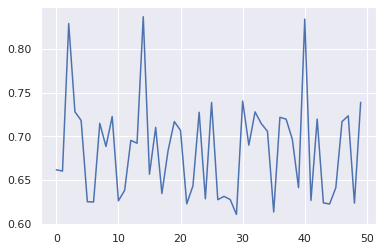

In [458]:
#Random 8 features within train to validate
iterations=1000
coefmat=np.zeros((1,len(x1_train[0])),dtype=int)
mean = df2['target'].mean()
df2.loc[df2['target'] <= mean, 'target'] = 0
df2.loc[df2['target'] > mean, 'target'] = 1
df_target=df2[['target']].values
features=df2.drop(columns=['target','Runtime','intercept'])
itera=[]
lsaccu=[]
for i in range(50):
  print('For seed=', i)
  df_feat=features.sample(axis = 1,random_state=i,n=8) 
  df_feat.insert(0,'intercept',1)
  df_features=df_feat.values
  x1_train, x1_test, y1_train, y1_test = train_test_split(df_features, df_target, test_size = 0.2, random_state = 0)
  threshold=[0.000001]
  alpha=[1]
  coefmat=np.zeros((1,len(x1_train[0])),dtype=int)
  iterations=1000
  print('For features: ', df_feat.columns)
  a=LogisticReg(x1_train,x1_train,y1_train,y1_train,alpha,iterations,coefmat,threshold)
  itera+=[i]
  lsaccu+=[a]
plt.plot(itera,lsaccu)